In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [14]:
house=pd.read_csv('house.csv')

In [15]:
house.columns

Index(['Area', 'Price'], dtype='object')

In [16]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
Area     8 non-null int64
Price    8 non-null int64
dtypes: int64(2)
memory usage: 208.0 bytes


In [17]:
house.head()

,Area,Price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [18]:
house.tail(7)

,Area,Price
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000
5,4200,749600
6,5000,830000
7,5500,867000


In [19]:
house.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,8.0,3887.5,996.332561,2600.0,3150.0,3800.0,4400.0,5500.0
Price,8.0,697075.0,117735.002078,550000.0,598750.0,702500.0,769700.0,867000.0


In [20]:
house.Area

0    2600
1    3000
2    3200
3    3600
4    4000
5    4200
6    5000
7    5500
Name: Area, dtype: int64

In [21]:
house.Price

0    550000
1    565000
2    610000
3    680000
4    725000
5    749600
6    830000
7    867000
Name: Price, dtype: int64

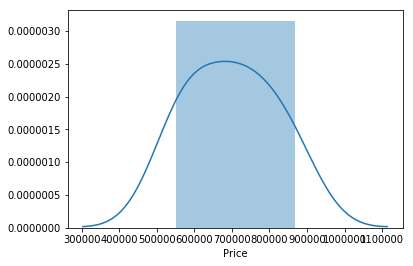

In [22]:
sb.distplot(house.Price)

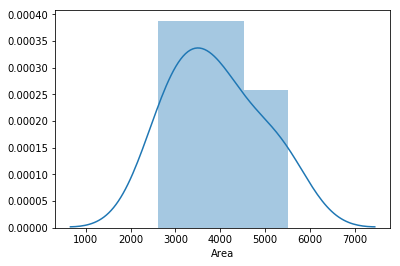

In [23]:
sb.distplot(house.Area)

In [24]:
house.corr()

,Area,Price
Area,1.000000,0.989849
Price,0.989849,1.000000


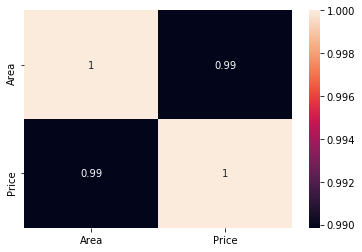

In [26]:
sb.heatmap(house.corr(),annot=True)

In [27]:
house.isnull()

,Area,Price
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False


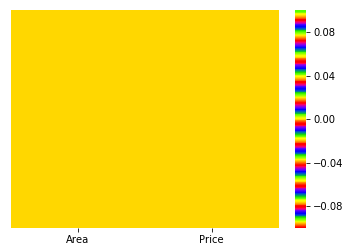

In [50]:
sb.heatmap(house.isnull(),cmap="prism",yticklabels=False)

In [51]:
X=house[['Area']]
y=house['Price']

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4)

In [54]:
X_train

,Area
2,3200
5,4200
6,5000
0,2600


In [55]:
y_train

2    610000
5    749600
6    830000
0    550000
Name: Price, dtype: int64

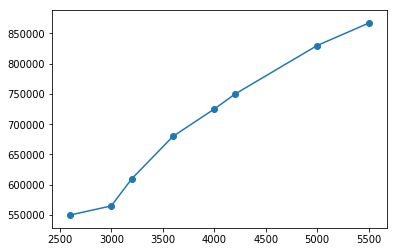

In [57]:
plt.plot(house.Area,house.Price)
plt.scatter(house.Area,house.Price)

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
radha=LinearRegression()#object creation for linear model

In [61]:
radha.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [63]:
radha.coef_# slope of line

array([120.00589971])

In [64]:
radha.intercept_ #const

234877.87610619463

In [66]:
radha.predict([[3000]])

array([594895.57522124])

In [67]:
120.00589971*3000+234877.87610619463 #y=mX+c

594895.5752361945

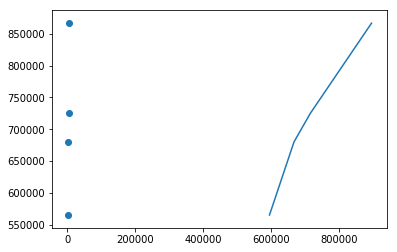

In [74]:
plt.plot(radha.predict(X_test),y_test)
plt.scatter(X_test,y_test)

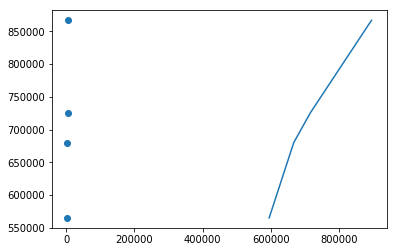

In [73]:
plt.scatter(X_test,y_test)
plt.plot(radha.predict(X_test),y_test)

In [71]:
pr=radha.predict(X_test)

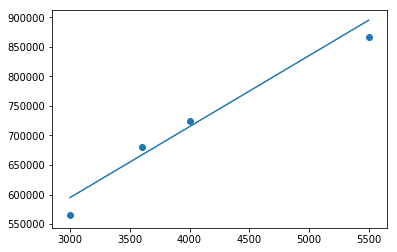

In [72]:
plt.plot(X_test,pr)
plt.scatter(X_test,y_test)  #mean square error

In [75]:
from sklearn import metrics

In [76]:
metrics.mean_absolute_error(y_test,pr)

20251.327433628263

In [77]:
metrics.mean_squared_error(y_test,pr)

486586256.47183514

In [78]:
np.sqrt(metrics.mean_squared_error(y_test,pr)) # root mean square

22058.70024438963

In [79]:
from sklearn.metrics import r2_score

In [80]:
r2_score(y_test,pr)  #Efficiency

0.9584085427751428